# Imports and preparation

In [1]:
%matplotlib inline
import numpy as np
import scipy.signal
import matplotlib.pylab as plt
import matplotlib.animation
import IPython.display

from beam_splitter import *

In [11]:
# N = 1800
# x, dx = np.linspace(-25, 155, N, endpoint=False, retstep=True)
x, dx = np.linspace(-10,10,5000,endpoint=True, retstep=True)
# psi0 = gaussian_wavepacket(x, x0=0.0, sigma0=5.0, p0=10)
sigma = 0.5
m = 10000
p0 = 10
psi0 = wave_packet(x,x0=0.0,dx=dx,mom=p0,sigma=sigma)
psi1 = excitation(x,x0=0.0,dx=dx,mom=p0,sigma=sigma)
psi2 = excitation2(x,x0=0.0,dx=dx,mom=p0,sigma=sigma)
psi = two_wave_packet(x,x0=-2.0,dx=dx,mom=-p0,sigma=sigma)

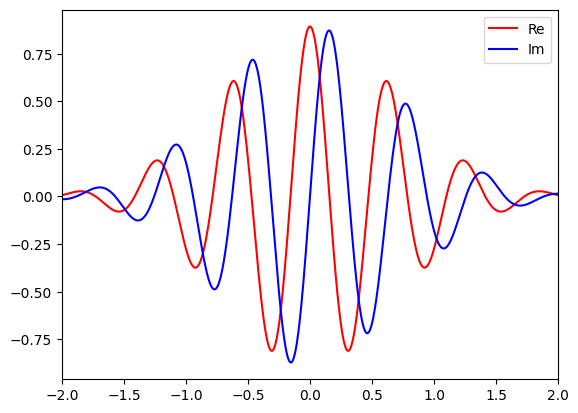

In [11]:
complex_plot(x,psi0)

# free particle

In [ ]:
psi0 = wave_packet(x,x0=0.0,dx=dx,mom=10,sigma=sigma)
sim_free = evolution(psi0,m,V=0,dx=dx,steps=40000,dt=0.1,save_every=1000)
animate(x,sim_free)

# In a box

In [ ]:
box_potential = np.where((x>-2)&(x<2),0,1)
psi0 = wave_packet(x,x0=0.0,dx=dx,mom=10,sigma=sigma)
sim_box_mom = evolution(psi0,m,V=box_potential,dx=dx,steps=100000,save_every=500)
animate(x,sim_box_mom,init_func=box_init,name='Box')

# Bouncing on a barrier

In [ ]:
barrier_weak_potential = np.where((x>1.4)&(x<1.6),3.5e-2,0)
psi0 = wave_packet(x,x0=0.0,dx=dx,mom=10,sigma=sigma)
sim_barrier_mom = evolution(psi0,m,V=barrier_weak_potential,dx=dx,steps=50000,save_every=500)
animate(x,sim_barrier_mom,init_func=barrier_init,name='barrier')

# In harmonic potential

In [5]:
omega0 = 1/(2*m*sigma**2)
harmonic_potential = m*np.square(omega0*x)/2
# psi0 = wave_packet(x,x0=-2.0,dx=dx,mom=10,sigma=sigma)
sim_harmonic_potential = evolution(psi,m,V=harmonic_potential,dx=dx,steps=40000,save_every=500)
animate(x,sim_harmonic_potential,init_func=harmonic_init,name='harmonic',V_sho=harmonic_potential)

MovieWriter Pillow unavailable; using Pillow instead.


In [3]:
omega0 = 1/(2*m*sigma**2)
harmonic_potential = m*np.square(omega0*x)/2
psi0 = wave_packet(x,x0=0,dx=dx,mom=0,sigma=sigma)
sim_harmonic_potential = evolution(psi0-1.86e-5*psi1,m,V=harmonic_potential,dx=dx,steps=40000,save_every=500,psic=psi1)
animate(x,sim_harmonic_potential,init_func=harmonic_init,name='harmonic',V_sho=harmonic_potential,kspace=True)

MovieWriter Pillow unavailable; using Pillow instead.


In [6]:
T = 2*np.pi/omega0

31415.92653589793

# Gaussian potential

In [49]:
V0 = 0.0172
alpha = 1000
G = V0*np.exp(-np.square(x)*alpha)
omega0 = 1/(2*m*sigma**2)
harmonic_potential = m*np.square(omega0*x)/2 + G
psi0 = wave_packet(x,x0=-2.0,dx=dx,mom=10,sigma=sigma)
sim_harmonic_potential = evolution(psi0,m,V=harmonic_potential,dx=dx,steps=400000,save_every=500)
animate(x,sim_harmonic_potential,init_func=harmonic_init,name='harmonic',V_sho=harmonic_potential)

MovieWriter Pillow unavailable; using Pillow instead.


# Beam splitter

In [19]:
135*p0/(m)

0.135

In [15]:
from scipy.fftpack import fft, fftshift, fftfreq, ifft
print(np.sum(np.abs(ifft(psi0))**2)/(4*np.pi*dx))
print(np.sum(np.abs(ifft(np.abs(ifft(psi0))))**2))
print(psi0)
print(fft(ifft(psi0)))

0.9943205467553523
9.998000000000005e-06
[1.23535302e-28+7.25416481e-29j 1.28501009e-28+8.25415999e-29j
 1.33359984e-28+9.34026586e-29j ... 2.56606344e-63-1.79721938e-63j
 2.39468387e-63-1.53820612e-63j 2.22962861e-63-1.30926894e-63j]
[ 2.77555756e-17-2.77555756e-17j -8.32667268e-17+2.77555756e-17j
  0.00000000e+00+2.77555756e-17j ...  2.77555756e-17-5.55111512e-17j
  0.00000000e+00+5.55111512e-17j -2.77555756e-17+2.22044605e-16j]


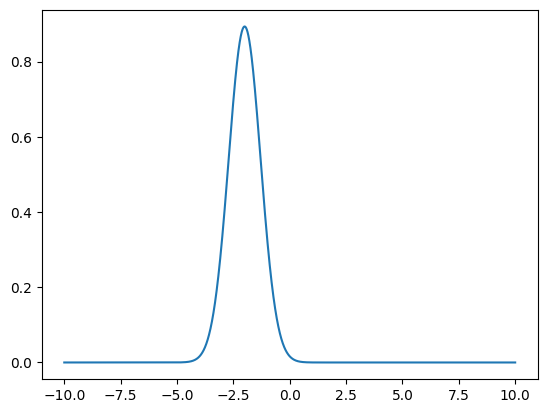

In [21]:
plt.plot(x,np.abs(psi0))

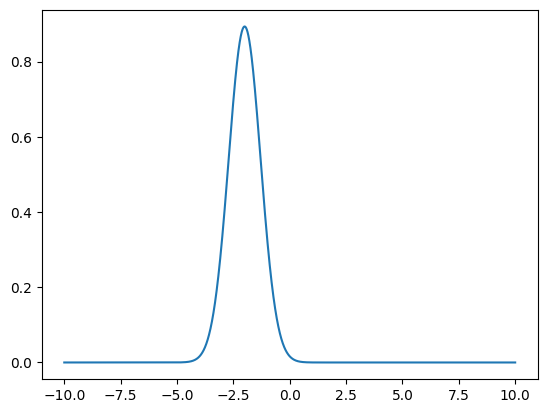

In [22]:
plt.plot(x,np.abs(fft(ifft(psi0))))

MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.


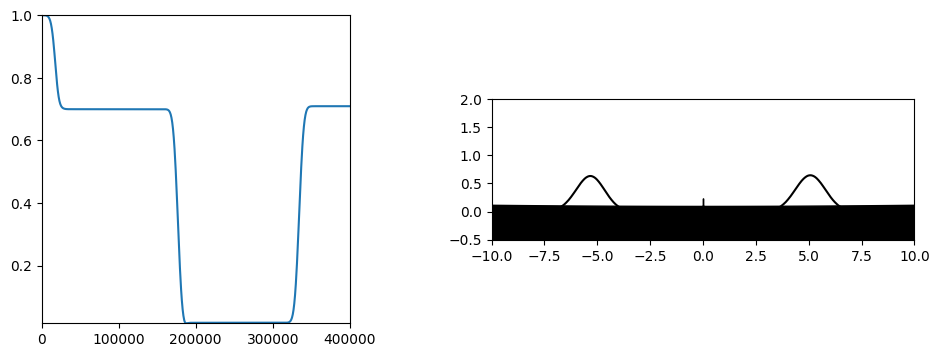

In [9]:
omega0 = 1/(2*m*sigma**2)
beam_splitter = m*np.square(omega0*x)/2
beam_splitter[2500] = 134*p0/(m)
beam_splitter[2499] = 134*p0/(m)
psi0 = wave_packet(x,x0=-2.0,dx=dx,mom=p0,sigma=sigma)
sim_beam_splitter,overlap,t = evolution(psi0,m,V=beam_splitter,dx=dx,steps=400000,save_every=500,V0=m*np.square(omega0*x)/2)
animate(x,sim_beam_splitter,init_func=beam_init,name='beam',V_sho=beam_splitter)
two_plot(t,overlap,x,sim_beam_splitter,beam_splitter+0.1)
# norm 9999999999999892

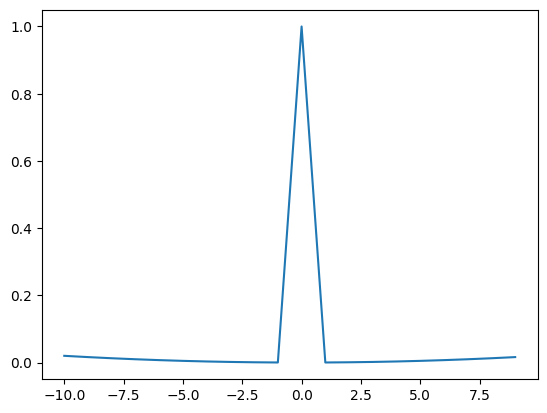

In [6]:
z, dz = np.linspace(-10,10,20,endpoint=False, retstep=True)
omega0 = 1/(2*m*sigma**2)
Vz = m*np.square(omega0*z)/2
Vz[10] += 1
plt.plot(z,Vz)

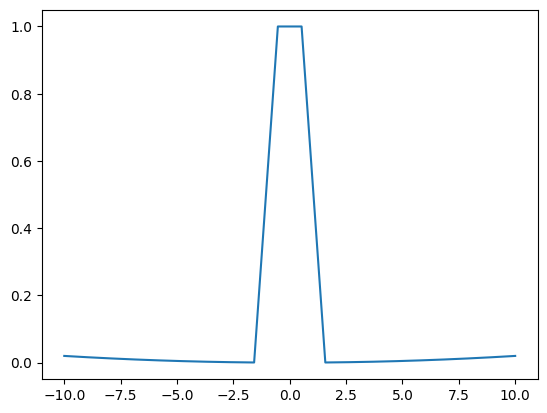

In [31]:
y, dy = np.linspace(-10,10,20,endpoint=True, retstep=True)
omega0 = 1/(2*m*sigma**2)
Vy = m*np.square(omega0*y)/2
Vy[10] += 1
Vy[9] += 1
plt.plot(y,Vy)

# Quantum Radar

In [23]:
omega0 = 1/(2*m*sigma**2)
radar = m*np.square(omega0*x)/2
radar[2500] = 50*p0/m
radar[2499] = 50*p0/m
radar[3750:] = 10
psi0 = wave_packet(x,x0=-2.0,dx=dx,mom=10,sigma=sigma)
sim_radar = evolution(psi0,m,V=radar,dx=dx,steps=400000,save_every=500)
animate(x,sim_radar,init_func=radar_init,name='beam',V_sho=radar+0.1)

MovieWriter Pillow unavailable; using Pillow instead.


In [24]:
radar = m*np.square(omega0*x)/2
radar[2500] = 50*p0/m
radar[2501] = 50*p0/m
radar[3750:] = 10
psi0 = wave_packet(x,x0=-2.0,dx=dx,mom=10,sigma=sigma)
sim_radar1 = evolution(psi0,m,V=radar,dx=dx,steps=400000,save_every=500)

# Cheat splitting

In [18]:
omega0 = 1/(2*m*sigma**2)
harmonic_potential = m*np.square(omega0*x)/2
harmonic_potential[3750:] = 10
sim_SHO = evolution(psi,m,V=harmonic_potential,dx=dx,steps=100000,save_every=500)
animate(x,sim_SHO,init_func=harmonic_init,name='harmonic',V_sho=harmonic_potential)

MovieWriter Pillow unavailable; using Pillow instead.


In [8]:
harmonic_potential[3749:] = 10
sim_SHO1 = evolution(psi,m,V=harmonic_potential,dx=dx,steps=100000,save_every=500)

# QFI

/Users/peteryang/Downloads/Radar_test/beam_splitter.py:266: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axl.set_ylim(min(qfi),max(qfi))
MovieWriter Pillow unavailable; using Pillow instead.


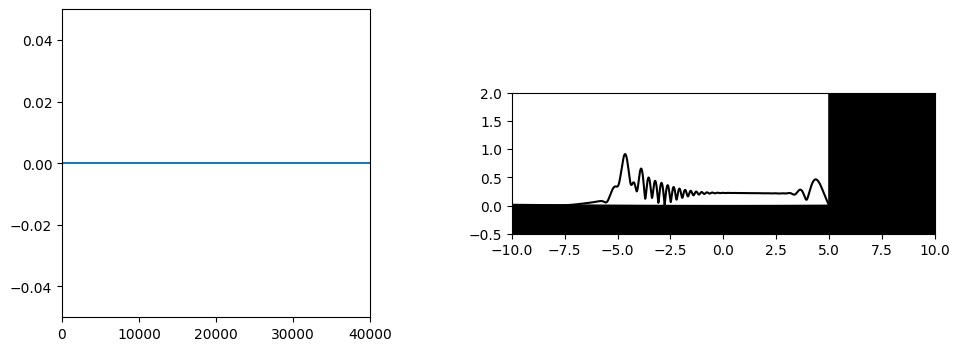

In [9]:
qfi = QFI([sim_SHO,sim_SHO1], dx)
two_plot(0.1*np.linspace(0,400000,len(qfi)),qfi,x,sim_SHO,harmonic_potential)

In [25]:
qfi = QFI([sim_radar,sim_radar1], dx)

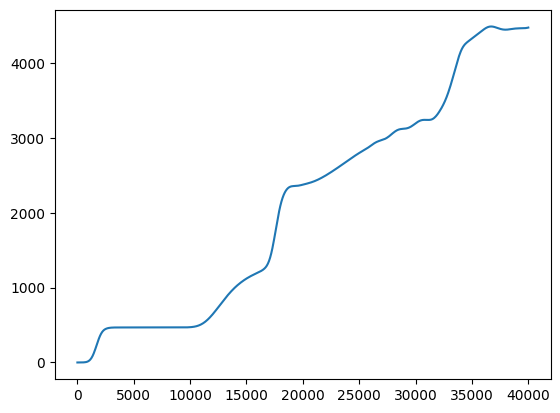

In [16]:
plt.plot(0.1*np.linspace(0,400000,len(qfi)),qfi)

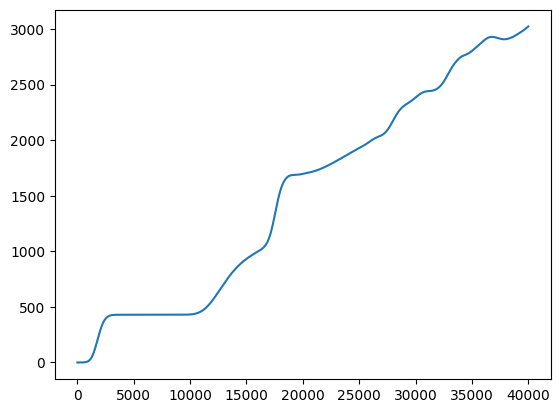

In [22]:
plt.plot(0.1*np.linspace(0,400000,len(qfi)),qfi)

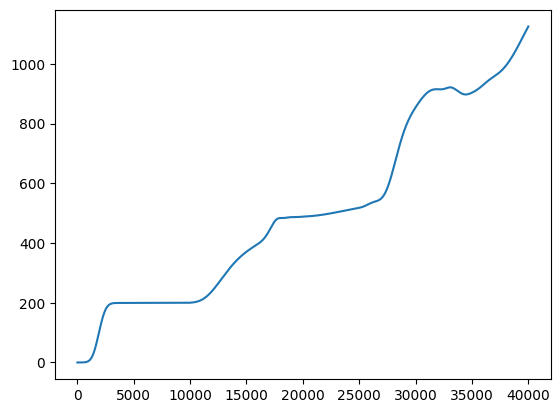

In [26]:
plt.plot(0.1*np.linspace(0,400000,len(qfi)),qfi)

MovieWriter Pillow unavailable; using Pillow instead.


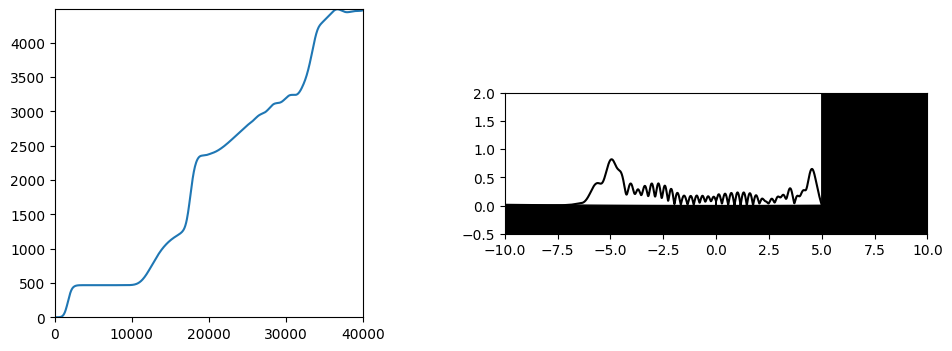

In [17]:
two_plot(0.1*np.linspace(0,400000,len(qfi)),qfi,x,sim_radar,radar)